In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
start_date = '1990-01-01'
end_date = '2023-12-31'
ticker = 'NYT'

df = yf.download(ticker, start_date, end_date)
print(df.head())
print(df.tail())
df.shape
df1 = df.drop(['Adj Close'],axis=1)
df1.head()
df1.shape[0]/365


[*********************100%%**********************]  1 of 1 completed
              Open     High      Low   Close  Adj Close  Volume
Date                                                           
1990-01-02  13.125  13.7500  13.0625  13.750   8.444192  191000
1990-01-03  13.625  13.6875  12.8750  12.875   7.906833  287600
1990-01-04  13.000  13.5000  13.0000  13.500   8.290666  270200
1990-01-05  13.500  13.5000  13.3125  13.375   8.213895   82400
1990-01-08  13.375  13.5000  13.2500  13.500   8.290666  119200
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-08-15  43.529999  43.740002  42.509998  42.959999  42.959999  1826100
2023-08-16  42.860001  43.450001  42.529999  42.580002  42.580002  4275200
2023-08-17  42.750000  43.000000  42.009998  42.009998  42.009998  1277900
2023-08-18  41.820000  43.080002  41.750000  43.060001  43.060001  1738600
2023-08-21  41.820000  43.130001 

23.216438356164385

In [10]:
df = yf.download(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [11]:
df.reset_index(inplace=True)

In [12]:
newdf=df[['Date','Close']]

In [13]:
newdf

,Date,Close
0,1990-01-02,13.750000
1,1990-01-03,12.875000
2,1990-01-04,13.500000
3,1990-01-05,13.375000
4,1990-01-08,13.500000
...,...,...
8469,2023-08-15,42.959999
8470,2023-08-16,42.580002
8471,2023-08-17,42.009998
8472,2023-08-18,43.060001


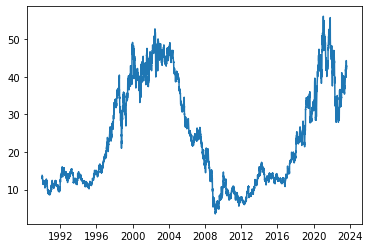

In [14]:
plt.plot(newdf['Date'],newdf['Close'])

In [15]:
from statsmodels.tsa.stattools import adfuller

In [18]:
adfuller(df['Close'])

(-1.3085867784104945,
 0.6252347530272594,
 32,
 8441,
 {'1%': -3.4311249425117616,
  '5%': -2.861882471527224,
  '10%': -2.5669522927118202},
 12960.917736917017)

In [21]:
adfuller(df['Close'].diff().dropna())

(-17.469744475424296,
 4.5496079189291864e-30,
 31,
 8441,
 {'1%': -3.4311249425117616,
  '5%': -2.861882471527224,
  '10%': -2.5669522927118202},
 12959.002326247499)

In [28]:
newdf.drop('Date',axis=1,inplace=True)

C:\Users\shlok\AppData\Local\Temp/ipykernel_1832/1116074229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.drop('Date',axis=1,inplace=True)


In [29]:
newdf.head()

,Close
0,13.750
1,12.875
2,13.500
3,13.375
4,13.500


In [30]:
len(newdf)

8474

In [32]:
newdf[:8001]

,Close
0,13.750000
1,12.875000
2,13.500000
3,13.375000
4,13.500000
...,...
7996,51.520000
7997,50.220001
7998,49.830002
7999,49.270000


In [33]:
x_train=newdf[:8001]

In [34]:
x_test=newdf[8001:]

In [35]:
len(x_test)

473

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

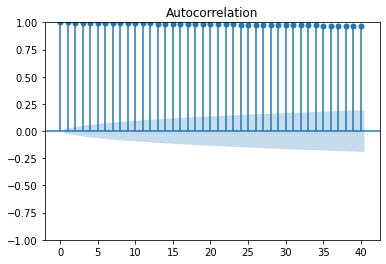

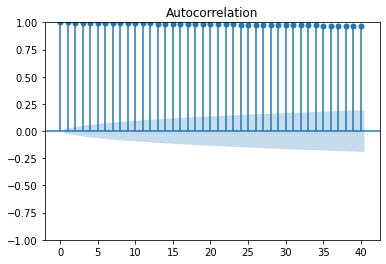

In [38]:
plot_acf(x_train)

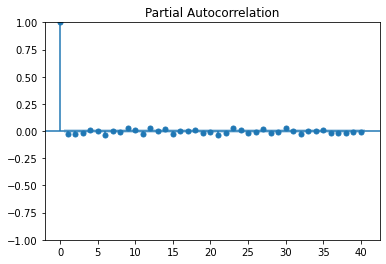

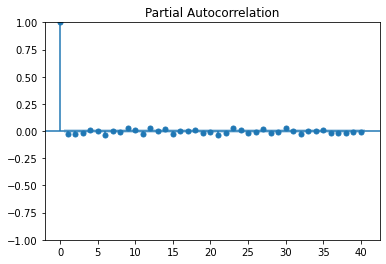

In [37]:
plot_pacf(x_train.diff().dropna())